In [ ]:
import rdkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from gensim.models import word2vec
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg
%matplotlib inline

In [ ]:
df = pd.read_csv('data/ESOL-solubility.csv')
df['RDKitMol'] = [rdkit.Chem.MolFromSmiles(x) for x in df['SMILES']]
df.head()

In [ ]:
rdkit.Chem.Draw.MolsToGridImage(list(df['RDKitMol'][:25]), molsPerRow=5, useSVG=False, legends=list(df['Compound ID'][:25]))

In [22]:
sentence = mol2alt_sentence(df['RDKitMol'][0], 1)
sentence

['1016841875',
 '198706261',
 '2245384272',
 '2910196842',
 '2245277810',
 '2035488874',
 '1016841875',
 '170894115',
 '1016841875',
 '170894115',
 '1016841875',
 '170894115']

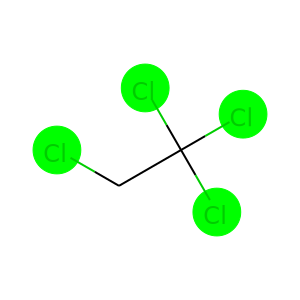

In [21]:
depict_identifier(df['RDKitMol'][0], 1016841875, 1)

In [ ]:
model = word2vec.Word2Vec.load('data/mol2vec_model_300dim.pkl')
print("Vocab size: ", len(model.wv.vocab.keys()))

In [25]:
type(model.wv['1016841875'])

numpy.ndarray

In [ ]:
#df['MolMat'] = np.array([model.wv[idx] for idx in [mol2alt_sentence(x, 1) for x in df['RDKitMol']] ])
sentences = [mol2alt_sentence(x, 1) for x in df['RDKitMol']]
vecs4sentences = []
for idx, sen in enumerate(sentences):
    vecs = []
    for iidx, i in enumerate(sen):
        try:
            vecs.append(model.wv[i])
        except KeyError as e:
            print(f"{idx}--{iidx}/{len(sen)}    {e.args}")
    vecs4sentences.append(np.array(vecs))
df['MolMat'] = vecs4sentences


Text(0, 0.5, 'frequency')

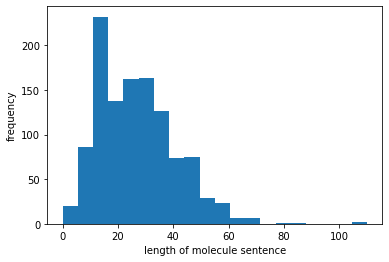

In [26]:
plt.hist([i.shape[0] for i in df['MolMat']], bins=20)
plt.xlabel('length of molecule sentence')
plt.ylabel('frequency')

In [ ]:
arr = sorted([i.shape[0] for i in df['MolMat']]) 

In [ ]:
arr[int(len(arr)*0.82)]

In [ ]:
np.mean(arr)

In [ ]:
np.std(arr)

In [ ]:
26+13


In [ ]:
features=np.array(df['MolMat'])
labels = np.array(df['measured log(solubility:mol/L)'])


In [19]:
len(df)

1144

In [27]:
predict = [[ 0.787985 ], [-0.18973327], [ 0.64871496], [-0.35283116], [-0.9817787 ], [ 0.04345651], [-0.9993782 ], [ 0.74826664], [ 0.5655375 ], [ 0.9978791 ], [-0.9989524 ], [-0.45316035], [-0.9896184 ], [-0.91265213], [-0.26798546], [ 0.53229874], [-0.03979412], [ 0.9668879 ], [-0.7251198 ], [-0.85254335], [ 0.3152662 ], [-0.5544358 ], [-0.355574 ], [ 0.99217707], [ 0.36582622], [ 0.5102163 ], [ 0.6994579 ], [ 0.57080674], [-0.21032786], [ 0.76214594], [-0.5117977 ], [ 0.9980425 ], [ 0.32028702], [-0.99994504], [-0.99993694], [ 0.49311528], [-0.77762884], [ 0.19463465], [-0.9902308 ], [ 0.08991497], [ 0.10489919], [ 0.7011794 ], [-0.38152912], [ 0.682822 ], [-0.7425216 ], [ 0.90376335], [-0.7102544 ], [ 0.9991832 ], [ 0.97746  ], [ 0.99866295], [ 0.99995893], [-0.99984425], [ 0.7281143 ], [-0.7420937 ], [ 0.78045976], [ 0.9384001 ], [ 0.0571623 ], [-0.7813219 ], [-0.2175423 ], [ 0.8377586 ], [-0.55441976], [ 0.9915033 ], [ 0.8565555 ], [-0.9982093 ], [ 0.13069792], [ 0.36476138], [-0.88067067], [ 0.99680275], [ 0.9999998 ], [ 0.64871496], [ 0.8329057 ], [ 0.06720804], [ 0.10870989], [-0.6328928 ], [ 0.650113 ], [-0.82728386], [-0.99028224], [ 0.8652946 ], [-0.08714521], [ 0.9997369 ], [ 0.9998669 ], [-0.99940526], [ 0.36458576], [-0.9991645 ], [-0.94432795], [-0.999846 ], [-0.1776436 ], [-0.747362 ], [-0.11279846], [ 0.0923759 ], [-0.9454822 ], [ 0.05548187], [-0.12604997], [-0.03162747], [ 0.9859243 ], [ 0.68773985], [-0.57786226], [-0.9994163 ], [-0.9421162 ], [ 0.78972363], [ 0.46141288], [-0.9203625 ], [ 0.08295672], [ 0.35310778], [-0.39416438], [ 0.6998777 ], [ 0.9350659 ], [ 0.9995961 ], [-0.967312 ], [ 0.6012566 ], [-0.9908651 ], [-0.30802795], [-0.4290928 ], [ 0.2660645 ], [ 0.05771627], [ 0.9366974 ], [ 0.9986427 ], [-0.29022098], [-0.47440955], [-0.9392578 ], [-0.3412671 ], [-0.73513156], [ 0.0610503 ], [-0.99779236], [ 0.5954408 ], [ 0.8247347 ], [-0.56816614], [-0.67395306], [-0.22412059], [ 0.9191563 ], [ 0.5602426 ], [-0.438017 ], [ 0.3540598 ], [-0.9949228 ], [ 0.08571099], [-0.93411547], [-0.61527157], [ 0.70703304], [-0.7047551 ], [-0.14711007], [ 0.92739016], [ 0.9978791 ], [ 0.9983424 ], [ 0.41687605], [-0.99966276], [ 0.9967243 ], [ 0.492806 ], [-0.81365275], [ 0.9999704 ], [-0.20946467], [ 0.47343498], [-0.9032289 ], [ 0.95143586], [ 0.18914133], [ 0.2924174 ], [ 0.79763246], [ 0.4004598 ], [ 0.9120502 ], [ 0.40774235], [ 0.19441463], [ 0.1685348 ], [-0.8395288 ], [ 0.9970731 ], [-0.527147 ], [ 0.02636828], [ 0.9504747 ], [ 0.70775694], [ 0.96099716], [-0.936595 ], [-0.99969435], [ 0.7390704 ], [-0.63094234], [ 0.95502955], [ 0.3612964 ], [-0.9244822 ], [ 0.35777873], [-0.44003007], [-0.97992206], [-0.99988633], [-0.6352977 ], [ 0.732487 ], [-0.89267325], [ 0.16413355], [-0.9819735 ], [ 0.9997726 ], [ 0.81741005], [ 0.9647513 ], [-0.3902706 ], [-0.7572031 ], [-0.9755048 ], [-0.66384256], [-0.18271397], [-0.00974434], [-0.06120184], [ 0.60944647], [ 0.7828257 ], [-0.5410805 ], [-0.15513457], [ 0.35991314], [ 0.9115412 ], [ 0.69134206], [ 0.06734709], [ 0.9522491 ], [ 0.7636256 ], [-0.83461046], [ 0.4651544 ], [ 0.9999808 ], [ 0.7121985 ], [-0.01043315], [-0.9992332 ], [ 0.98766863], [ 0.9999172 ], [-0.95331514], [-0.8722923 ], [ 0.99990195], [ 0.2738146 ], [-0.05918504], [ 0.13344724], [-0.19411483], [ 0.99504405], [ 0.4982773 ], [-0.7491299 ], [-0.99576366], [ 0.9931935 ], [-0.2930869 ], [ 0.28044128], [ 0.39767188], [ 0.7172311 ], [-0.9996685 ]]
truth = [[ 9.82063223e-01], [-6.06037152e-01], [ 2.47185045e-01], [-5.06780878e-01], [-1.05555354e+00], [ 3.37851833e-01], [-1.67590525e+00], [ 8.43677073e-01], [ 6.01251450e-02], [ 1.61195880e+00], [-2.46804667e+00], [ 5.63075960e-02], [-1.33232584e+00], [-8.65153289e-01], [ 9.92550221e-02], [ 3.37851833e-01], [-7.31061881e-01], [ 5.33501218e-01], [-8.31272541e-01], [-1.54754017e+00], [ 2.89178084e-01], [-6.55665288e-01], [-7.24381170e-01], [ 1.02023871e+00], [ 4.76237984e-01], [ 1.13570831e-01], [ 1.26837940e+00], [ 8.38905137e-01], [ 1.10517918e+00], [ 5.28729282e-01], [-2.34780514e-01], [ 1.64536236e+00], [ 3.23536025e-01], [-2.90706480e+00], [-2.01375834e+00], [ 4.61922175e-01], [ 1.56518257e-01], [ 2.42413109e-01], [-1.32755391e+00], [ 6.58514685e-02], [ 2.29040425e-02], [ 1.05364227e+00], [-2.72956003e-01], [ 3.18764088e-01], [-9.55342883e-01], [ 5.95536389e-01], [-5.44956368e-01], [ 1.11567744e+00], [ 1.32087070e+00], [ 1.53083589e+00], [ 1.23497584e+00], [-2.62552056e+00], [ 1.28555837e+00], [-1.03169386e+00], [ 2.47185045e-01], [ 9.86835160e-01], [-2.00433835e-02], [-4.96759812e-01], [-1.48885662e-01], [ 4.33290558e-01], [-4.63833452e-01], [ 9.08098212e-01], [ 9.05712244e-01], [-1.54229104e+00], [-1.15482108e-01], [-2.29054190e-01], [-1.34950482e+00], [ 1.44016910e+00], [ 1.99371370e+00], [ 2.47185045e-01], [ 4.68125692e-01], [ 3.09220216e-01], [ 1.06318614e+00], [-7.97868988e-01], [ 2.73907888e-01], [-5.49728304e-01], [-1.04600967e+00], [ 8.43677073e-01], [ 1.70834065e-01], [ 1.34473038e+00], [ 1.11567744e+00], [-1.62818589e+00], [ 2.71044726e-01], [-2.59211701e+00], [-4.88170327e-01], [-2.32011664e+00], [-6.26079284e-01], [-1.25883803e+00], [-1.91833088e-01], [-3.25447302e-01], [-7.78781243e-01], [ 5.43045091e-01], [-1.25025980e-01], [-1.67019019e-01], [ 9.53431606e-01], [ 5.59269674e-01], [-4.92465070e-01], [-2.01471272e+00], [-1.47262077e+00], [ 5.09641537e-01], [ 2.76759787e-02], [-4.27089543e-01], [-8.00254956e-01], [ 5.09641537e-01], [-8.33658510e-01], [ 9.45319314e-01], [ 6.86203177e-01], [ 1.25883552e+00], [-1.05078161e+00], [ 6.00308325e-01], [-1.86201077e+00], [-4.49517644e-01], [-3.01587621e-01], [-9.55638626e-04], [-2.53868258e-01], [ 1.26837940e+00], [ 1.81238013e+00], [-2.30008577e-01], [-5.59272177e-01], [-2.01471272e+00], [-4.15159703e-01], [-9.50570947e-01], [ 3.56939578e-01], [-2.37737988e+00], [ 3.28307961e-01], [ 3.04448280e-01], [-7.73532113e-01], [ 1.32658576e-01], [-3.58850855e-01], [ 1.17294067e+00], [ 7.19606731e-01], [-7.64465434e-01], [ 4.64785337e-01], [-1.48979974e+00], [ 1.13570831e-01], [-1.23211518e+00], [-3.77938600e-01], [ 4.81009920e-01], [-8.02640924e-01], [-3.54078919e-01], [ 1.26837940e+00], [ 1.61195880e+00], [ 1.35427425e+00], [ 1.56518257e-01], [-2.04191276e+00], [ 1.90781885e+00], [ 3.84139615e-01], [-1.65347715e+00], [ 1.66445010e+00], [ 1.13570831e-01], [ 6.76659305e-01], [-3.62191211e-01], [ 7.57782221e-01], [-2.99201653e-01], [ 1.37430512e-01], [ 8.48449009e-01], [ 5.10118731e-01], [ 1.41153748e+00], [ 3.18764088e-01], [ 6.10795323e-02], [ 8.58936006e-02], [-1.24165906e+00], [ 1.41535503e+00], [-4.30429899e-01], [-1.52714473e-02], [ 1.60241493e+00], [ 4.90553792e-01], [ 1.70262559e+00], [-2.53868258e-01], [-1.81429140e+00], [ 5.04869601e-01], [-4.49517644e-01], [ 9.29571925e-01], [ 2.28097300e-01], [-5.99356441e-01], [ 2.94904407e-01], [-5.82188733e-02], [-1.69976493e+00], [-2.64460831e+00], [-9.64886756e-01], [ 7.62554157e-01], [-5.92675730e-01], [ 5.96967970e-01], [-2.33920439e+00], [ 1.67876591e+00], [ 7.40603250e-01], [ 1.13953712e+00], [-6.49938965e-01], [-5.11552814e-01], [-1.27029067e+00], [-4.97237006e-01], [-7.25346820e-02], [ 1.85149874e-01], [ 3.66483451e-01], [ 5.23957346e-01], [ 6.28939943e-01], [-1.87538345e-01], [-1.72745343e-01], [-1.58429534e-01], [ 8.38905137e-01], [ 7.48238348e-01], [ 2.13781491e-01], [ 6.95747050e-01], [ 6.86203177e-01], [ 6.34655004e-02], [ 5.04869601e-01], [ 1.94599434e+00], [ 4.71466047e-01], [ 3.37851833e-01], [-1.83337915e+00], [ 1.16339680e+00], [ 1.82192400e+00], [-7.88325115e-01], [-3.52170145e-01], [ 1.44971297e+00], [ 3.34988671e-01], [-5.83131858e-01], [-8.20785544e-02], [-4.39030646e-02], [ 5.30160863e-01], [ 5.47817027e-01], [-5.03917717e-01], [-1.48789097e+00], [ 1.07750195e+00], [-5.85995020e-01], [ 4.34244945e-01], [ 3.99887004e-01], [ 1.50983937e+00], [-2.28671309e+00]] 
predict = np.array(predict)*2.0955854254462576+-3.0579973776223777
truth = np.array(truth)*2.0955854254462576+-3.0579973776223777

[-8, 0, -8, 0]

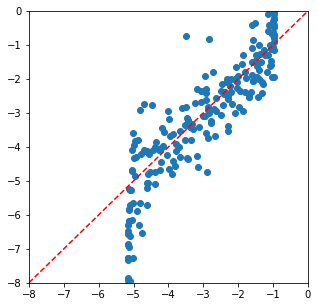

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(predict.ravel(), truth.ravel())
plt.plot([-8, 0], [-8, 0], 'r--')
plt.axis([-8,0,-8,0])

In [33]:
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,RDKitMol,MolMat
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[[-0.025743626, -0.2115425, 0.03667211, 0.3237..."
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[[-0.13674529, 0.06729241, -0.052130535, -0.00..."
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[[-0.025743626, -0.2115425, 0.03667211, 0.3237..."
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[[-0.025743626, -0.2115425, 0.03667211, 0.3237..."
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[[0.2066171, -0.17666312, -0.090702206, 0.1664..."


In [34]:
truth = df.iloc[:, 1]


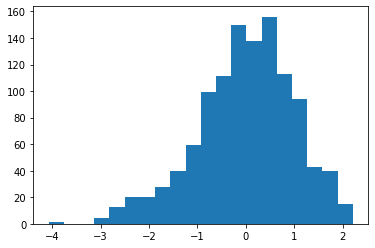

In [43]:
_ = plt.hist(((truth-truth.mean())/truth.std()), bins=20)


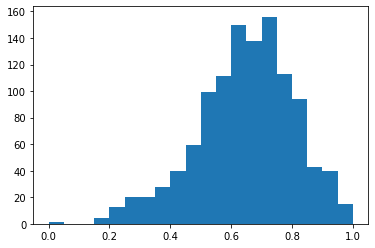

In [44]:
_ = plt.hist((truth - truth.min())/ (truth.max()-truth.min()), bins=20)

In [50]:
truth.min(), truth.max(), truth.mean(), truth.std()

(-11.6, 1.58, -3.0579973776223777, 2.0965019290656026)